In [1]:
import math
import numpy as np
import json
import random
import matplotlib.pyplot as plt
import copy

In [127]:
density = 5
density2 = 20
epsilon = 0.01
epsilon2 = 0.01

In [18]:
def getDataset(dataset):
    cleanDataset = {
        "matrix" : [],
        "cluster": [],
    }
    for i in range(len(dataset)):
        point = getPoint(dataset[i],i)
        cleanDataset["matrix"].append(point)
        cleanDataset["cluster"].append(dataset[i]["cluster"])
    return cleanDataset

In [4]:
def getPoint(oPoint,t):
    point = {
        "coord" : [],
        "neigh" : [],
        "cluster" : -2,
        "pos" : t
    }
    for i in oPoint:
        if i != "cluster":
            point["coord"].append(oPoint[i])
    point["coord"] = np.array(point["coord"])
    return point

In [66]:
def normalize(matrix):
    lists = []
    for i in range(len(matrix[0]["coord"])):
        lists.append(np.array(getList(matrix,i)))
    for i in range(len(lists)):
        norm = np.linalg.norm(lists[i])
        lists[i] = lists[i]/norm
    for i in range(len(lists[0])):
        for j in range(len(lists)):
            matrix[i]["coord"][j] = lists[j][i]
    return matrix

In [52]:
def getList(matrix,t):
    #print(matrix[0])
    array = []
    for i in matrix:
        array.append(i["coord"][t])
    return array

In [7]:
def getDistance(point1,point2):
    distance = np.linalg.norm(point1 - point2)
    return distance

In [27]:
def dbscan(dataset,den,ep):
        getNeighs(dataset["matrix"],ep)
        dfs(dataset["matrix"],dataset["cluster"],den) print(nDataset["matrix"][341]["cluster"])

In [9]:
def getNeighs(dataset,ep):
    for i in range(len(dataset)):
        for j in range(len(dataset)):
            if j == i:
                continue
            if getDistance(dataset[i]["coord"],dataset[j]["coord"]) < ep:
                dataset[i]["neigh"].append(j)

In [24]:
def dfs(matrix,clusters,den):
    sumCluster = -1
    for i in range(len(matrix)):
        if matrix[i]["cluster"] != -2:
            continue
        countNeigh = len(matrix[i]["neigh"])
        if countNeigh < den:
            matrix[i]["cluster"] = -1
            continue
        sumCluster += 1
        clusters[i] = sumCluster
        matrix[i]["cluster"] = sumCluster
        dfsColor(matrix,i,clusters)

In [21]:
def dfsColor(matrix,i,clusters):
    for j in matrix[i]["neigh"]:
        if matrix[j]["cluster"] > -1:
            continue
        else:
            matrix[j]["cluster"] = matrix[i]["cluster"]
            clusters[j] = matrix[i]["cluster"]
            dfsColor(matrix,j,clusters)

In [125]:
def cleanOutliers(dataset):
    clean = []
    for i in range(len(dataset["cluster"])):
        if(dataset["cluster"][i] <= -1):
            clean.append(i)
    for i in range(len(clean)):
        del dataset["cluster"][clean[i]-i]
        del dataset["matrix"][clean[i]-i]

In [34]:
def print2d(dataset,path):
    #print(getList(dataset["matrix"],0))
    #print(getList(dataset["matrix"],1))
    plt.scatter(getList(dataset["matrix"],0),getList(dataset["matrix"],1),c = dataset["cluster"])
    plt.title("clusteredData")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.savefig(path)

In [112]:
def printCount(dataset,path):
    clusterCount = []
    manyCluster = getManyCluster(dataset["cluster"])
    for i in manyCluster:
        clusterCount.append(getClusterCount(dataset["matrix"],i))
    print(manyCluster)
    print(clusterCount)
    plt.bar(manyCluster,clusterCount)
    plt.title("Clusters length")
    plt.xlabel("Cluster")
    plt.ylabel("Number of elements in cluster")
    plt.grid(True)
    plt.savefig(path)

In [98]:
def getClusterCount(matrix,k):
    summ = 0
    for i in matrix:
        if i["cluster"] == k:
            summ += 1
    return summ

In [89]:
def getManyCluster(clusters):
    many = []
    for i in clusters:
        if len(many) == 0:
            many.append(i)
            continue
        tam = len(many) - 1
        k = binarySearch(i,many,0,tam)
        if many[k] == i:
            continue
        if many[k] > i:
            many.insert(k,i)
        if many[k] < i:
            if k == tam:
                many.append(i)
            else:
                many.insert(k+1,i)
    return many

In [96]:
def binarySearch(element,array,ini,end):
    if ini >= end:
        return ini
    mid = math.floor((ini+end)/2)
    if array[mid] == element:
        return mid
    elif array[mid] < element:
        return binarySearch(element,array,mid+1,end)
    else:
        return binarySearch(element,array,ini,mid)

In [111]:
def printDbScan(dataset,den,ep,printable,path):
    dbscan(dataset,den,ep)
    cleanOutliers(dataset)
    printable(dataset,path)

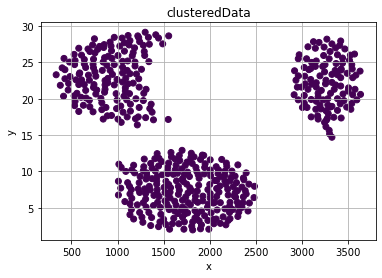

In [100]:
exist = True
try:
    f = open("../data/teacherData.json","r")
    stringSet = f.read()
    f.close()
except:
    print("Arquivo não existe")
    exist = False
if(exist):
    dataset = json.loads(stringSet)
    nDataset = getDataset(dataset)
    print2d(nDataset,"../images/originalData1.png")
    #plt.scatter(getList(nDataset["matrix"],0),getList(nDataset["matrix"],1))
    #plt.title("Original Data")
    #plt.xlabel("x")
    #plt.ylabel("y")
    #plt.grid(True)
    #plt.savefig("../images/originalData1.png")
    nDataset["matrix"] = normalize(nDataset["matrix"])
    #for i in nDataset["matrix"]:
       # print(i["coord"])

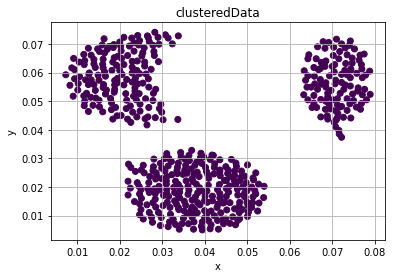

In [68]:
print2d(nDataset,"../images/test.png")

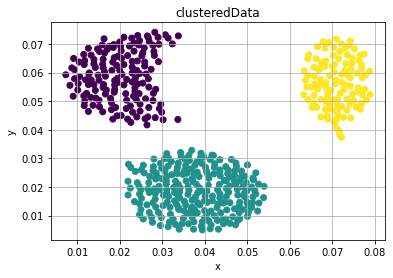

In [101]:
printDbScan(nDataset,density,epsilon,print2d,"../images/dbscanClustered1.png")
#for i in nDataset["matrix"]:
    #print(i["coord"])

In [121]:
exist = True
try:
    f = open("../data/strokeData.json","r")
    stringSet2 = f.read()
    f.close()
except:
    print("Arquivo não existe")
    exist = False
if(exist):
    dataset2 = json.loads(stringSet2)
    nDataset2 = getDataset(dataset2)
    nDataset2["matrix"] = normalize(nDataset2["matrix"])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[398, 228, 241, 243, 467, 235, 231, 173, 479, 398, 201, 238, 69, 69, 80, 47, 65, 46]


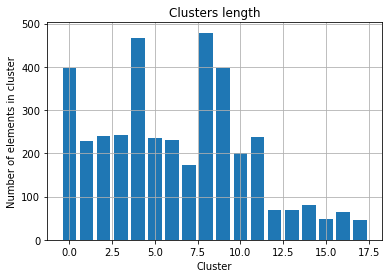

In [126]:
printDbScan(nDataset2,density2,epsilon,printCount,"../images/dbscanCount2.png")